# LOTKA VOLTERRA (sistema predador-presa)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint

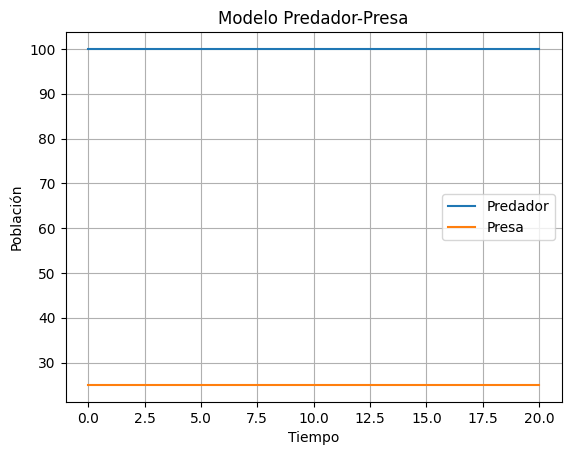

In [ ]:
# Parámetros del sistema predador-presa
alpha = 0.25  # x en ausencia de presas tiende a decaer a una tasa alpha
beta = 1      # y en ausencia de predadores tiende a crecer a una tasa beta
gamma = 0.01  # gamma
delta = 0.01

# Definir las derivadas del sistema
def derivadas(X, t, alpha, beta, gamma, delta):
    x, y = X
    dotx = x * (-alpha + gamma * y)
    doty = y * (beta - delta * x)
    return np.array([dotx, doty])

# Parámetros de la integración
Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [100, 25] #PUNTO DE EQUILIBRIO como condición inicial
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas, X0, t, args=(alpha, beta, gamma, delta))
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x, label="Predador")
plt.plot(t, y, label="Presa")
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Predador-Presa')
plt.grid()
plt.show()


Ahora voy a elegir un punto que no sea de equilibrio

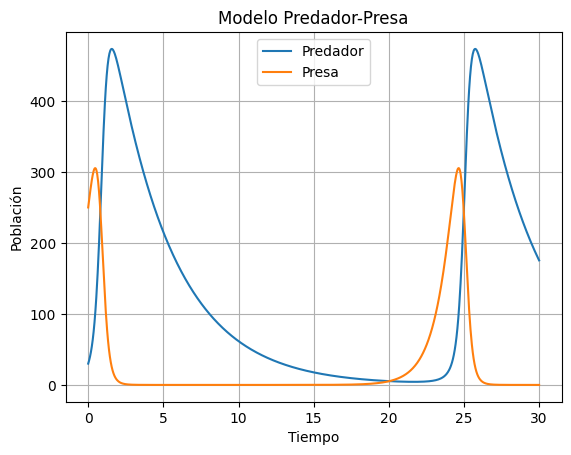

In [ ]:
X1 = [30, 250] #Condición inicial

t1 = np.linspace(0,30, Nt)
# Integración de las ecuaciones
res = integrate.odeint(derivadas, X1, t1, args=(alpha, beta, gamma, delta))
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t1, x, label="Predador")
plt.plot(t1, y, label="Presa")
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Predador-Presa')
plt.grid()
plt.show()

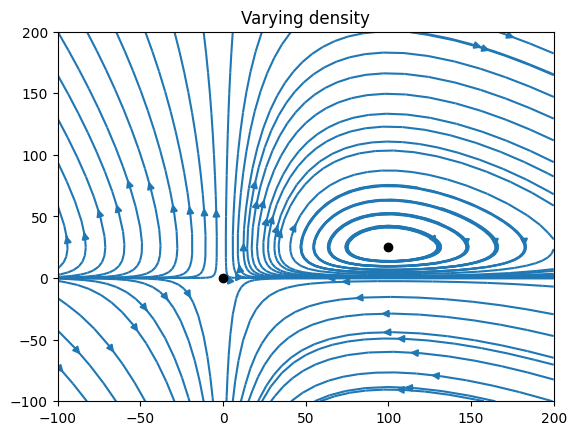

In [ ]:
w_1 = -100
w_2 = 200
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]

U, V = derivadas([X,Y],  t, alpha, beta, gamma, delta)

plt.streamplot(X, Y, U, V, density=[0.6,0.6], broken_streamlines=False)
plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
plt.plot([beta/delta],[alpha/gamma], marker = 'o', markersize=6, linestyle='', color='k')
plt.title("Varying density")
plt.show()

# MODELO SIR

SIR (susceptible, infectado, recuperado)

x en ausencia de presas tiende a decaer a una tasa alpha

In [ ]:
beta = 0.2      #tasa de infección
gamma = 0.1  # tasa de recuperacion
N = 10000

# Definir las derivadas del sistema
def derivadas2(X, t, beta, gamma, N):
    S, I, R = X
    dotS =  (-beta) * S * I * (1/N)
    dotI = beta * S * I * (1/N) - gamma * I
    dotR = gamma * I
    return np.array([dotS, dotI, dotR])

In [ ]:
# Parámetros de la integración
Nt = 1000
tmax = 150
t = np.linspace(0, tmax, Nt)
X0 = [9999, 1, 0] #PUNTO DE EQUILIBRIO
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas2, X0, t, args=(beta, gamma, N))
S, I, R = res.T  # Obtener las soluciones de x e y

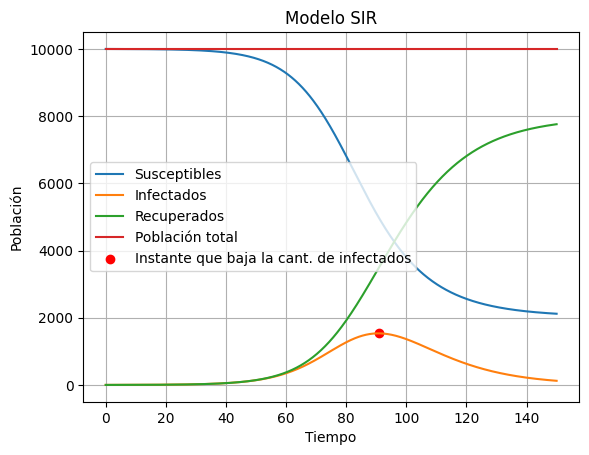

In [ ]:
# Encontrar el índice donde dotI es menor o igual a cero por primera vez
dotI = beta * S * I * (1/N) - gamma * I
indice_cambio_cero = np.argmax(dotI < 0) #Le saqué el igual porque sino me ponía t = 0

# Graficar los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.plot(t, S + I + R, label="Población total") #JOYA, COMPROBÉ QUE SE MANTIENE CONSTANTE
plt.scatter(t[indice_cambio_cero], I[indice_cambio_cero], color='red', label='Instante que baja la cant. de infectados')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo SIR')
plt.grid()
plt.show()

# HUTCHINSON

In [ ]:
pip install jitcdde


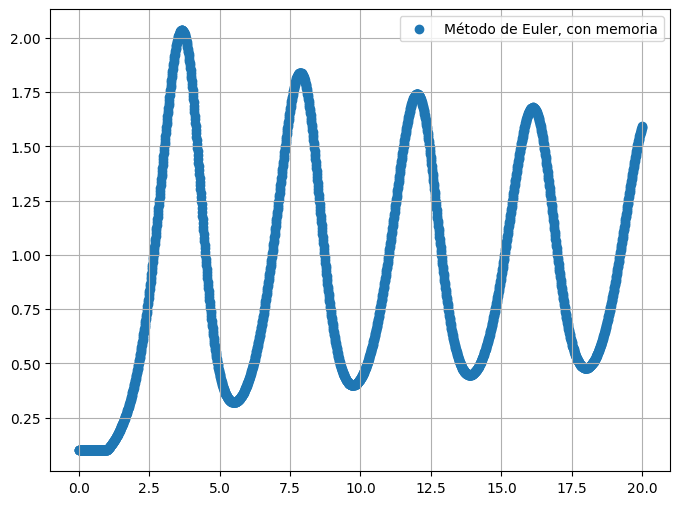

In [ ]:
def metodoEulerMemoria(derivada,puntoMemoria,valorMemoria, paso, objetivo, origen, valorInicial):
    #Asumiendo que origen < objetivo
    valorMemoria.extend([valorInicial])
    valores = valorMemoria
    puntoMemoria.extend([origen])
    puntos = puntoMemoria
    puntoActual = origen
    valorActual = valorInicial
    indiceAnterior = 0
    while(puntoActual < objetivo):
        valorActual = valorActual + paso * derivada(puntoActual,valorActual,valores[indiceAnterior])
        puntoActual = puntoActual + paso
        indiceAnterior += 1
        puntos.append(puntoActual)
        valores.append(valorActual)
    return puntos, valores

r = 1.6
k = 1

paso = 0.01
objetivo = 20
origen = 1
longitudMemoria = 1
valorInicial = 0.1
puntoMemoria = [0]
valorMemoria = [valorInicial]
for i in range(1,int(longitudMemoria / paso)):
    puntoMemoria.append(puntoMemoria[i-1] + paso)
    valorMemoria.append(valorInicial)

puntos, valores = metodoEulerMemoria(lambda t, f,fanterior: r * f * (1- fanterior /k), puntoMemoria,valorMemoria,paso, objetivo, origen, valorInicial)

x_values = np.array(puntos)


# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, valores, label='Método de Euler, con memoria')

plt.legend()
plt.grid(True)
plt.show()


# Oscilador de Van Der Pol

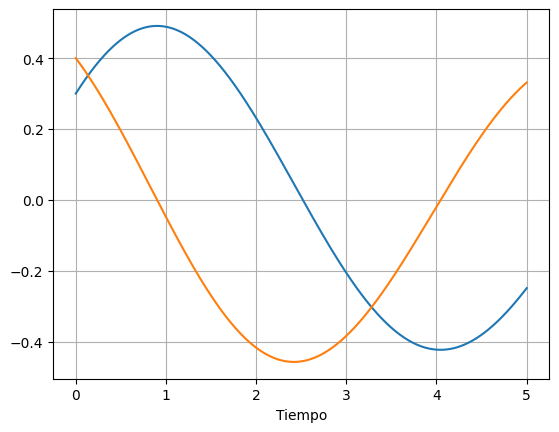

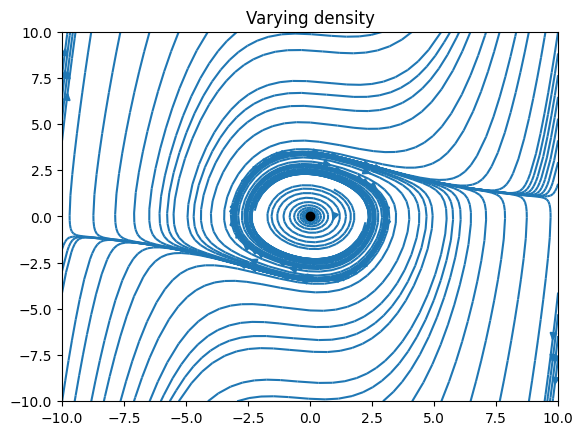

In [28]:
u = 0.1

def oscilador_van_del_pol(cond_inic, t, u):
  x, y = cond_inic
  dxdt = y
  dydt = -u * (1 - x**2)*y - x
  return([dxdt, dydt])

Nt = 1000
tmax = 5
t = np.linspace(0, tmax, Nt)
condicion_inicial = [0.3, 0.4]

solucion = integrate.odeint(oscilador_van_del_pol, condicion_inicial, t, args = (u, ))
X, Y = solucion.T

plt.plot(t, X)
plt.plot(t, Y)
plt.xlabel('Tiempo')
plt.grid()
plt.show()

i = -10
f = 10
Y, X = np.mgrid[i:f:100j,i:f:100j]

U, V = oscilador_van_del_pol([X,Y], t, u)

plt.streamplot(X, Y, U, V, density=[0.6,0.6], broken_streamlines=False)
plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
plt.title("Varying density")
plt.show()